In [1]:
import os
os.chdir("../")

In [38]:
import numpy as np
from matplotlib import pyplot as plt
import torch

from cids.util.metrics import f1_score

In [40]:
distances = np.random.exponential(scale=1, size=(2048,))
distances_mal = np.random.normal(loc=3, scale=1, size=(1024,))
distances_mal[distances_mal < 0] = 0

distances = torch.tensor(distances)
distances_mal = torch.tensor(distances_mal)

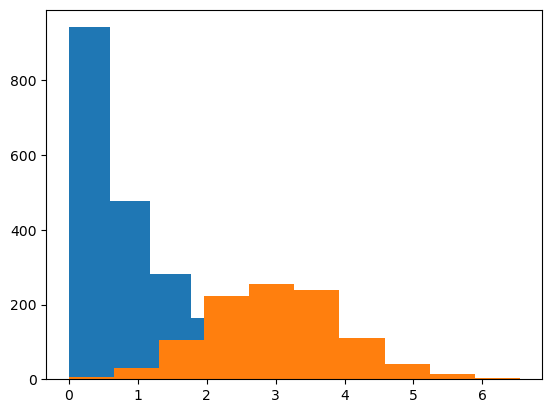

In [41]:
plt.hist(distances)
plt.hist(distances_mal)
plt.show()

In [44]:
max_score = max([distances.max().item(), distances_mal.max().item()])
thresholds = torch.tensor(np.linspace(0, max_score, 1000)[:-2])
print(max_score, thresholds.shape)

6.542910159559243 torch.Size([998])


In [45]:
tp = distances_mal[:, None] > thresholds
fp = distances[:, None] > thresholds
fn = distances_mal[:, None] < thresholds
tn = distances[:, None] < thresholds
print(tp.shape)
tp = torch.sum(tp, dim=0)
fp = torch.sum(fp, dim=0)
fn = torch.sum(fn, dim=0)
tn = torch.sum(tn, dim=0)
print(tp.shape)

torch.Size([1024, 998])
torch.Size([998])


In [46]:
f1s = f1_score(tp, fp, tn, fn)

In [47]:
print(f1s.shape)
m, i = torch.max(f1s, dim=0)

torch.Size([998])


In [49]:
print(m, i, thresholds[297])

tensor(0.8108) tensor(297) tensor(1.9452, dtype=torch.float64)


In [51]:
print(thresholds[torch.argmax(f1s)].item())

1.9451895068959912
